<a href="https://colab.research.google.com/github/yunnsss/ML/blob/main/Chp1/3)_k_%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fish=pd.read_csv("/content/drive/MyDrive/ML/Data/fish.csv")
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [ ]:
#bream(도미)데이터 준비
bream=fish[fish['Species']== 'Bream']
bream.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
# 필요없는 열 제거
bream=bream.drop(labels=['Species','Diagonal','Height','Width'],axis=1) #axis=1 : 열을 기준으로 작업
bream.head()

,Weight,Length
0,242.0,25.4
1,290.0,26.3
2,340.0,26.5
3,363.0,29.0
4,430.0,29.0


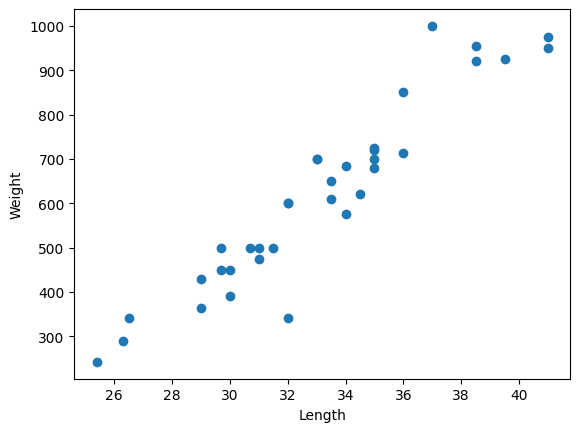

In [ ]:
# 산점도 그리기
plt.scatter(bream['Length'],bream['Weight'])
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [ ]:
# smelt 방어 데이터 준비
smelt=fish[fish['Species']== 'Smelt']
smelt.head()

,Species,Weight,Length,Diagonal,Height,Width
145,Smelt,6.7,9.8,10.8,1.7388,1.0476
146,Smelt,7.5,10.5,11.6,1.9720,1.1600
147,Smelt,7.0,10.6,11.6,1.7284,1.1484
148,Smelt,9.7,11.0,12.0,2.1960,1.3800
149,Smelt,9.8,11.2,12.4,2.0832,1.2772


In [ ]:
# 필요없는 열 제거
smelt=smelt.drop(labels=['Species','Diagonal','Height','Width'],axis=1)
smelt.head()

,Weight,Length
145,6.7,9.8
146,7.5,10.5
147,7.0,10.6
148,9.7,11.0
149,9.8,11.2


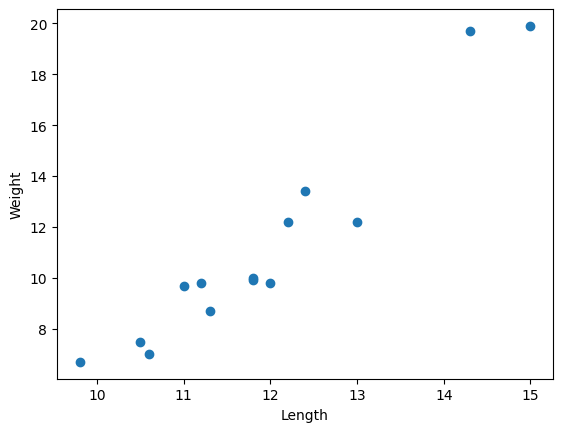

In [ ]:
# 산점도 그리기
plt.scatter(smelt['Length'],smelt['Weight'])
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

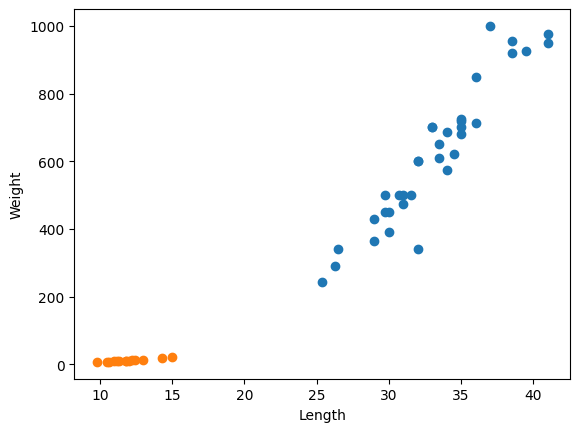

In [ ]:
# 도미와 방어 산점도 그리기
plt.scatter(bream['Length'],bream['Weight']) #파랑
plt.scatter(smelt['Length'],smelt['Weight']) #주황
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

방어는 도미에 비해 길이가 짧고 무게가 가볍다.

In [ ]:
#  라이브러리에서 데이터프레임을 조작할 때, 원본 데이터프레임을 직접 수정하라는 의미
bream.rename(columns={'Length':'bream_length','Weight':'bream_weight'},inplace=True)
smelt.rename(columns={'Length':'smelt_length','Weight':'smelt_weight'},inplace=True)

In [ ]:
length=pd.concat([bream['bream_length'],smelt['smelt_length']])
weight=pd.concat([bream['bream_weight'],smelt['smelt_weight']])

In [ ]:
# zip(): 나열된 리스트 각각에서 하나씩 원소를 꺼내 반환
fish_data=[[l,w] for l,w in zip(length,weight)]

In [ ]:
fish_data # 2차원 리스트

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [ ]:
fish_target=[1]*35 + [0]*14
fish_target

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

**k-최근접 이웃 알고리즘** \
- 어떤 데이터에 대한 답을 구할 때 주위의 다른 데이터를 보고 다수를 차지하는 것을 정답으로 사용한다.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# k-최근접 이웃 알고리즘 구현한 클래스
kn=KNeighborsClassifier()

In [ ]:
# 모델 적합
kn.fit(fish_data,fish_target)

KNeighborsClassifier()

In [ ]:
# 모델 정확도 점수
kn.score(fish_data,fish_target)

1.0

1.0 이라는건 모든 fish_data의 답을 정확히 맞췄다는 의미. \
(0.5 라면 절반만 맞췄다는 의미)

In [ ]:
kn.predict([[30,600]]) # 1: 도미
# 그래프를 그려서 해당 좌표를 확인하면 주변에 도미가 많음을 확인할 수 있다.

array([1])

In [ ]:
## 가장 가까운 49개의 데이터를 사용하는 k-최근접 이웃 모델에 적용

# 참고 데이터를 49개로 한 kn49 모델
kn49=KNeighborsClassifier(n_neighbors=49)

# predict
kn49.fit(fish_data, fish_target)

# 정확도
kn49.score(fish_data, fish_target)

0.7142857142857143

즉 fish_data에 있는 데이터중 35개가 도미이고 14개는 병어이다.

In [ ]:
# 점수가 1.0 아래로 내려가기 시작하는 이웃의 개수 찾기
kn=KNeighborsClassifier()
kn.fit(fish_data,fish_target)

for n in range(5,50):
  # k-최근접 이웃 개수 설정
  kn.n_neighbors= n
  # 점수 계산
  score = kn.score(fish_data,fish_target)
  # 100% 정확도에 미치치 못하는 이웃 개수 출력
  if score<1 :
    print(n, score)
    break


18 0.9795918367346939
